In [ ]:
#pd.to_datetime(insert_df_column)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import datetime

In [ ]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 22

# Uploading Data

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()
# Get the filename
#file_name = next(iter(uploaded))
# Read the data into a DataFrame
df = pd.read_csv('/content/flight.csv')

Saving flight.csv to flight.csv


In [ ]:
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,2,0,0.0,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,4,0,0.0,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,2,0,0.0,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,2,0,0.0,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


Penjelasan Tentang Feature dalam data set

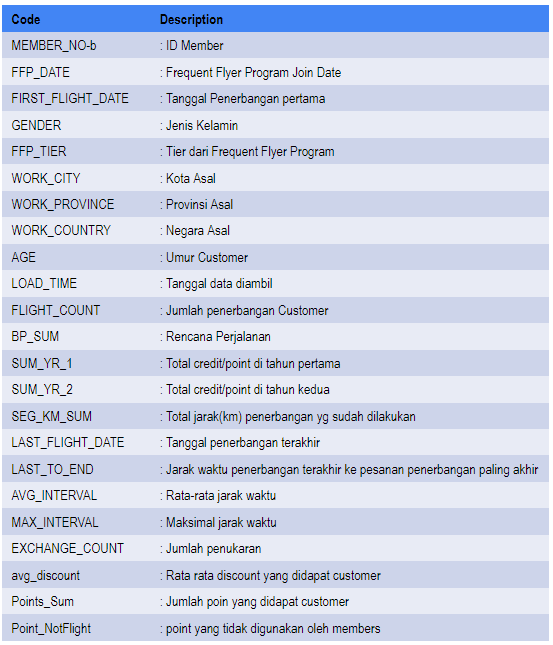

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

# Data Cleaning

In [ ]:
#some times we could make a wrong move here. I choose to protect my df so that if I make a mistake I don't need to re-upload or re-import it again
df_copy = df.copy()

In [ ]:
data_null = df_copy.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df_copy))*100,3)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,2269,3.602
2,SUM_YR_1,551,0.875
3,AGE,420,0.667
4,SUM_YR_2,138,0.219
5,WORK_COUNTRY,26,0.041
6,GENDER,3,0.005


lets check our data that has NaN or Null data

In [ ]:
df_copy[df_copy['GENDER'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
271,58411,12/12/2009,4/15/2010,NaN,6,MENAI,SYDNEY,AU,61.0,3/31/2014,17,135654,30570.0,89477.0,105377,3/31/2014,1,43.000000,175,2,1.056396,159060,3
22471,55908,10/14/2012,1/14/2013,NaN,4,PARAMUS,NEW JERSEY,US,43.0,3/31/2014,8,12220,6630.0,5670.0,8604,3/18/2014,14,61.285714,173,0,1.258319,12220,0
42565,4533,1/25/2011,2/1/2011,NaN,4,guangzhoushi,guangdong,CN,62.0,3/31/2014,5,2982,4465.0,0.0,7845,2/26/2013,400,16.250000,31,0,0.521791,2982,0


In [ ]:
df_copy[df_copy['WORK_CITY'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
23,28474,4/13/2010,4/13/2010,Male,6,NaN,CA,US,41.0,3/31/2014,20,256337,64258.0,59600.0,222380,1/18/2014,74,32.789474,110,8,1.004904,280760,9
24,58472,2/14/2010,3/1/2010,Female,5,NaN,NaN,FR,48.0,3/31/2014,44,204801,38510.0,75816.0,281837,3/15/2014,17,15.883721,66,10,0.787308,235939,12
69,47919,12/14/2008,5/20/2010,Female,6,NaN,VIC,AU,43.0,3/31/2014,30,198230,80383.0,91978.0,184194,3/25/2014,7,24.448276,92,3,0.928504,212047,3
104,30681,5/26/2010,11/5/2010,Male,6,NaN,NaN,JP,55.0,3/31/2014,48,168825,96104.0,95788.0,150537,3/21/2014,11,14.914894,70,5,1.001145,220976,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,31906,3/9/2011,9/10/2013,Male,4,NaN,NaN,TW,51.0,3/31/2014,2,700,0.0,1260.0,368,9/15/2013,199,5.000000,5,0,0.835000,700,0
62956,2213,5/18/2005,7/19/2005,Female,4,NaN,NaN,CN,45.0,3/31/2014,2,0,0.0,422.0,904,1/19/2014,73,41.000000,41,0,0.320000,0,0
62967,359,4/12/2012,5/30/2012,Male,4,NaN,guangdong,CN,34.0,3/31/2014,2,0,350.0,0.0,1096,5/31/2012,671,1.000000,1,0,0.250000,0,0
62970,38088,3/11/2005,6/16/2005,Female,4,NaN,NaN,CN,47.0,3/31/2014,2,0,350.0,0.0,1096,10/11/2012,538,2.000000,2,0,0.250000,0,0


In [ ]:
df_copy[df_copy['WORK_PROVINCE'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
8,32197,6/7/2011,7/1/2011,Male,5,DRANCY,NaN,FR,50.0,3/31/2014,56,262958,72596.0,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
17,58899,11/10/2010,2/23/2011,Female,6,PARIS,NaN,FR,50.0,3/31/2014,40,249882,66239.0,63260.0,284160,2/16/2014,45,17.589744,77,12,0.837844,281705,13
24,58472,2/14/2010,3/1/2010,Female,5,NaN,NaN,FR,48.0,3/31/2014,44,204801,38510.0,75816.0,281837,3/15/2014,17,15.883721,66,10,0.787308,235939,12
34,28014,12/1/2006,1/7/2011,Female,6,Paris,NaN,FR,48.0,3/31/2014,47,218842,63100.0,69298.0,285144,3/29/2014,3,15.804348,105,5,0.725686,251712,7
45,58693,12/11/2010,8/6/2011,Male,6,PARIS,NaN,FR,39.0,3/31/2014,21,219390,54900.0,63000.0,185493,3/10/2014,22,34.900000,154,4,1.029508,237893,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62966,60676,7/12/2012,2/8/2013,Male,4,RIYADH,NaN,AA,37.0,3/31/2014,2,400,830.0,0.0,368,2/14/2013,412,6.000000,6,0,0.750000,400,0
62970,38088,3/11/2005,6/16/2005,Female,4,NaN,NaN,CN,47.0,3/31/2014,2,0,350.0,0.0,1096,10/11/2012,538,2.000000,2,0,0.250000,0,0
62974,11163,5/8/2005,8/26/2005,Male,4,NaN,NaN,CN,34.0,3/31/2014,2,400,0.0,960.0,368,1/3/2014,89,70.000000,70,0,0.710000,900,1
62975,30765,11/16/2008,11/30/2013,Male,4,TAIPEI,NaN,TW,38.0,3/31/2014,2,400,0.0,910.0,368,12/2/2013,121,2.000000,2,0,0.670000,400,0


In [ ]:
df_copy[df_copy['WORK_COUNTRY'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
2226,45041,7/26/2007,11/14/2007,Male,4,NaN,NaN,NaN,49.0,3/31/2014,46,44113,19660.0,13741.0,61442,3/13/2014,19,15.377778,95,1,0.817299,44113,1
4563,18124,3/31/2006,7/24/2011,Male,4,NaN,NaN,NaN,66.0,3/31/2014,21,35284,1360.0,31996.0,29440,3/28/2014,4,26.900000,188,0,1.218094,36630,0
8282,35987,3/31/2006,8/4/2006,Male,4,NaN,NaN,NaN,52.0,3/31/2014,9,23955,4200.0,11497.0,16952,7/7/2013,269,51.500000,200,0,1.473311,24843,1
13502,20244,4/6/2005,6/17/2005,Male,4,NaN,NaN,NaN,47.0,3/31/2014,12,13664,12683.0,672.0,18837,3/5/2014,27,63.363636,349,1,0.924350,30934,37
16058,20268,4/23/2005,7/19/2005,Male,4,NaN,NaN,NaN,49.0,3/31/2014,19,9392,3020.0,10850.0,24242,3/26/2014,6,40.166667,157,1,0.620168,9392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59161,45042,9/12/2008,10/20/2009,Female,4,NaN,NaN,NaN,54.0,3/31/2014,2,1152,1488.0,0.0,1746,10/16/2012,533,111.000000,111,0,0.800000,1152,0
59181,8953,5/3/2007,4/3/2013,Male,4,NaN,NaN,NaN,49.0,3/31/2014,2,1216,0.0,1650.0,3276,4/8/2013,359,5.000000,5,0,0.425000,1216,0
59896,35986,3/9/2006,6/9/2006,Male,4,NaN,NaN,NaN,52.0,3/31/2014,4,2000,1344.0,1115.0,1553,9/2/2013,212,170.000000,285,0,0.822022,2000,0
61316,35989,3/31/2006,5/15/2008,Male,4,NaN,NaN,NaN,44.0,3/31/2014,2,1332,0.0,3310.0,1104,7/29/2013,247,2.000000,2,0,0.920000,1332,0


In [ ]:
df_copy[df_copy['AGE'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
21,41281,6/7/2011,6/9/2011,Male,6,VECHEL,NORD BRABANT,AN,NaN,3/31/2014,23,255573,46800.0,198224.0,214590,3/26/2014,6,32.909091,135,7,1.061631,286520,9
335,47095,12/2/2004,12/2/2004,Male,4,dongguan,guangdong,CN,NaN,3/31/2014,12,123044,45211.0,21663.0,103960,11/17/2013,136,52.909091,135,4,1.007991,134703,9
707,3920,5/16/2009,3/25/2010,Male,5,fushunshi,liaoningsheng,CN,NaN,3/31/2014,34,78812,29640.0,38853.0,90814,3/4/2014,28,20.969697,37,1,0.883529,80200,1
1282,58032,9/12/2012,9/12/2012,Male,4,VALINDA,CA,US,NaN,3/31/2014,10,38174,16918.0,5400.0,100472,5/23/2013,314,28.111111,91,0,0.634800,38174,0
1562,32415,11/20/2011,12/6/2011,Male,4,YANAGAWA CITY,FUKUOKA-KEN,JP,NaN,3/31/2014,65,45232,46808.0,48004.0,89309,2/23/2014,38,10.671875,57,0,0.654887,47453,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62632,5191,4/7/2011,4/7/2011,Male,5,shantou,guangdong,CN,NaN,3/31/2014,2,1000,0.0,1109.0,760,3/25/2014,7,1.000000,1,0,0.840000,1000,0
62654,37551,6/6/2011,6/11/2011,Male,4,guangzhou,guangdong,CN,NaN,3/31/2014,4,2000,2058.0,0.0,736,10/3/2012,546,41.000000,49,0,0.850000,2000,0
62719,55413,5/19/2009,10/19/2012,Male,4,guangzhou,guangdong,CN,NaN,3/31/2014,2,0,566.0,0.0,2356,11/25/2012,493,37.000000,37,0,0.250000,0,0
62777,30178,5/22/2008,1/22/2009,Male,4,dalian,liaoning,CN,NaN,3/31/2014,2,532,0.0,1300.0,1104,5/18/2013,319,2.000000,2,0,0.500000,532,0


In [ ]:
df_copy[df_copy['SUM_YR_1'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
5595,53807,6/20/2008,6/20/2008,Male,4,changchun,jilin,CN,55.0,3/31/2014,23,29973,NaN,0.0,38933,2/26/2013,400,14.227273,37,10,0.821863,29973,10
6605,43887,8/6/2010,8/15/2010,Female,4,shanghai,shanghai,CN,31.0,3/31/2014,38,24068,NaN,0.0,39632,3/16/2013,382,9.378378,36,1,0.728828,24068,3
10196,24497,4/3/2012,4/3/2012,Male,4,lishuishi,zhejiangsheng,CN,32.0,3/31/2014,15,17797,NaN,0.0,26850,12/28/2012,460,19.214286,40,1,0.806667,17797,1
16897,34788,11/20/2010,2/22/2011,Female,4,shanghai,shanghai,CN,37.0,3/31/2014,20,10734,NaN,0.0,20918,2/8/2013,418,15.473684,52,1,0.687114,14030,23
18177,56998,11/1/2007,1/12/2008,Male,4,shanghai,shanghai,CN,65.0,3/31/2014,8,11310,NaN,0.0,11976,10/28/2012,521,28.142857,111,1,1.125000,11310,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62923,16431,1/17/2013,1/26/2013,Male,4,beijing,.,CN,40.0,3/31/2014,2,400,NaN,0.0,746,2/24/2013,402,29.000000,29,0,0.500000,400,0
62943,7426,3/22/2013,3/22/2013,Male,4,dongying,shandong,CN,49.0,3/31/2014,2,200,NaN,0.0,746,3/25/2013,373,3.000000,3,0,0.425000,200,0
62955,50599,10/19/2011,10/19/2011,Male,4,shanghai,shanghai,CN,35.0,3/31/2014,2,400,NaN,0.0,728,10/21/2012,528,3.000000,3,0,0.400000,400,0
62979,34330,3/16/2013,3/17/2013,Male,4,wulumuqi,xinjiang,CN,41.0,3/31/2014,2,0,NaN,0.0,746,3/19/2013,379,2.000000,2,0,0.250000,0,0


In [ ]:
df_copy[df_copy['SUM_YR_2'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
29671,39966,1/1/2009,1/28/2009,Male,4,shenyang,liaoning,CN,52.0,3/31/2014,6,5238,0.0,NaN,10155,11/15/2013,138,7.600000,18,0,0.748599,5238,0
30880,7876,7/1/2011,7/16/2011,Male,4,shenyang,liaoning,CN,38.0,3/31/2014,11,3340,0.0,NaN,14905,12/23/2013,100,26.300000,60,0,0.481818,3340,0
31026,35327,6/5/2011,5/1/2013,Male,4,hetianxian,xinjiang,CN,48.0,3/31/2014,10,4209,0.0,NaN,13410,12/11/2013,112,24.888889,88,0,0.532000,4209,0
34847,56636,7/4/2007,7/4/2007,Male,4,shanghai,shanghai,CN,38.0,3/31/2014,2,5694,0.0,NaN,4222,12/18/2013,105,3.000000,3,0,1.410000,5694,0
35937,24269,12/12/2011,4/19/2013,Male,4,kunshan,jiangsu,CN,30.0,3/31/2014,4,4947,0.0,NaN,6770,12/27/2013,96,84.000000,181,0,0.835000,4947,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62824,27287,2/8/2011,10/15/2013,Female,4,wuhan,hubei,CN,28.0,3/31/2014,2,0,0.0,NaN,1522,10/27/2013,157,12.000000,12,0,0.330000,477,8
62825,45539,2/15/2013,7/3/2013,Female,4,wuhanshi,hubei,CN,27.0,3/31/2014,2,0,0.0,NaN,1522,7/8/2013,268,5.000000,5,0,0.330000,0,0
62842,10325,9/20/2009,9/20/2009,Male,4,yining,xinjiang,CN,67.0,3/31/2014,2,400,0.0,NaN,1102,12/10/2013,113,38.000000,38,0,0.440000,400,0
62914,21610,3/24/2010,3/24/2010,Male,4,shanghai,shanghai,CN,41.0,3/31/2014,2,400,0.0,NaN,746,6/11/2013,295,1.000000,1,0,0.515000,400,0


Most of the NA data does not represent all data set so we are clear to drop them

In [ ]:
df_copy = df_copy.dropna()

In [ ]:
data_null = df_copy.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df_copy))*100,3)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage


Check for duplication

In [ ]:
#checking for total duplication data
df_copy.duplicated().sum()

0

In [ ]:
#dive in to our diplicated data
df_copy[df_copy.duplicated()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [ ]:
#if we want to drop duplicated data we can follow this code
#df_copy = df_copy.drop_duplicates()

In [ ]:
#checking our new data set after Null and Duplicated data cleaning
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58255 non-null  int64  
 1   FFP_DATE           58255 non-null  object 
 2   FIRST_FLIGHT_DATE  58255 non-null  object 
 3   GENDER             58255 non-null  object 
 4   FFP_TIER           58255 non-null  int64  
 5   WORK_CITY          58255 non-null  object 
 6   WORK_PROVINCE      58255 non-null  object 
 7   WORK_COUNTRY       58255 non-null  object 
 8   AGE                58255 non-null  float64
 9   LOAD_TIME          58255 non-null  object 
 10  FLIGHT_COUNT       58255 non-null  int64  
 11  BP_SUM             58255 non-null  int64  
 12  SUM_YR_1           58255 non-null  float64
 13  SUM_YR_2           58255 non-null  float64
 14  SEG_KM_SUM         58255 non-null  int64  
 15  LAST_FLIGHT_DATE   58255 non-null  object 
 16  LAST_TO_END        58255 no

#Explore Our Data set

In [ ]:
df_copy1 = df_copy.reset_index()
df_copy1 = df_copy1.drop(columns=['index'],axis=1)

In [ ]:
df_copy1

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
2,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
3,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
4,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,92,313338,112364.0,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58250,16415,1/20/2013,1/20/2013,Female,4,beijing,.,CN,35.0,3/31/2014,2,0,0.0,0.0,3848,1/20/2013,437,0.000000,0,0,0.000000,0,0
58251,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,2,0,0.0,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
58252,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,4,0,0.0,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
58253,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,2,0,0.0,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0


In [ ]:
df_copy1['FFP_DATE'] = pd.to_datetime(df_copy1['FFP_DATE'])
df_copy1['FIRST_FLIGHT_DATE'] = pd.to_datetime(df_copy1['FIRST_FLIGHT_DATE'])
df_copy1['LOAD_TIME'] = pd.to_datetime(df_copy1['LOAD_TIME'])

It looks like we have a different value of time in column LAST_FLIGHT_DATE, and we need to drop them

(we receive message = time data "2014/2/29  0:00:00" doesn't match format "%m/%d/%Y", at position 59.)

In [ ]:
condition = df_copy1['LAST_FLIGHT_DATE']=="2014/2/29  0:00:00"
df_copy1.drop(df_copy1[condition].index,inplace=True)

In [ ]:
df_copy1['LAST_FLIGHT_DATE']=pd.to_datetime(df_copy1['LAST_FLIGHT_DATE'])

Finally, we choose our recency from last flight as our present day

recency data, it means how long did the customer take their last order to present day

In [ ]:
present_day = df_copy1['LAST_FLIGHT_DATE'].max()+datetime.timedelta(days=2)
#we enter this code -> datetime.timedelta(days=2) just for the example that today's condition is 2 days after the latest last order

#now we can calculate our recency
recency = df_copy1.groupby('MEMBER_NO').agg({'LAST_FLIGHT_DATE': lambda date: (present_day - date.max()).days
                                        }).reset_index()

recency = recency.rename(columns={"LAST_FLIGHT_DATE": "recency"})
recency.head()

,MEMBER_NO,recency
0,3,84
1,4,31
2,6,47
3,11,70
4,12,3


Next we are going to make our frequency and monetary data

In [ ]:
dataset = df_copy1.groupby(['MEMBER_NO']).agg({'FLIGHT_COUNT' : ['sum'],'Points_Sum' : ['sum']
}).reset_index()

We chose FLIGHT_COUNT as our frequency data because we are talking about how often customers book with our app. By using the number of flights we can see how many times customers have order with our application

We also chose Points_Sum as our monetary, because we believe (since we can't ask our other team for how much money did the customer spend in their trip, so we make our own decisions) depending on the price of the flight, their points should be higher if the price the customer pays is also higher.

In [ ]:
dataset

,MEMBER_NO,FLIGHT_COUNT,Points_Sum
,,sum,sum
0,3,9,85008
1,4,12,10826
2,6,3,2390
3,11,24,7225
4,12,13,13452
...,...,...,...
57855,62984,40,38725
57856,62985,13,16324
57857,62986,22,19140


In [ ]:
#just checking if our data is right and every thing right where it is (we are checking on MEMBER_NO = 3 for their last flight, flight count, and points sum)
df_copy1[df_copy1['MEMBER_NO']==3]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
21171,3,2006-04-07,2006-04-07,Female,4,HKG,HKG,CH,52.0,2014-03-31,9,7508,5793.0,2288.0,20660,2014-01-08,84,80.125,269,2,0.522271,85008,5


In [ ]:
dataset.columns = ['MEMBER_NO','frequency','monetary']
dataset.head()

,MEMBER_NO,frequency,monetary
0,3,9,85008
1,4,12,10826
2,6,3,2390
3,11,24,7225
4,12,13,13452


#Our New Data set

In [ ]:
dataset = dataset.merge(recency, on='MEMBER_NO', how='inner')
dataset.head()

,MEMBER_NO,frequency,monetary,recency
0,3,9,85008,84
1,4,12,10826,31
2,6,3,2390,47
3,11,24,7225,70
4,12,13,13452,3


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MEMBER_NO  57860 non-null  int64
 1   frequency  57860 non-null  int64
 2   monetary   57860 non-null  int64
 3   recency    57860 non-null  int64
dtypes: int64(4)
memory usage: 1.8 MB


In [ ]:
dataset[dataset.duplicated()]

,MEMBER_NO,frequency,monetary,recency


#Normalization

In [ ]:
feature = ['frequency','monetary','recency']
dataset = dataset[feature].copy()
dataset

,frequency,monetary,recency
0,9,85008,84
1,12,10826,31
2,3,2390,47
3,24,7225,70
4,13,13452,3
...,...,...,...
57855,40,38725,3
57856,13,16324,157
57857,22,19140,29
57858,6,9907,134


In [ ]:
X_std = StandardScaler().fit_transform(dataset)

In [ ]:
feats = list(dataset)
feats

['frequency', 'monetary', 'recency']

In [ ]:
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,frequency,monetary,recency
0,-0.213703,3.505414,-0.489977
1,-0.003020,-0.091913,-0.783494
2,-0.635069,-0.501002,-0.694885
3,0.839712,-0.266537,-0.567510
4,0.067208,0.035431,-0.938559


#Finding best cluster

<Axes: >

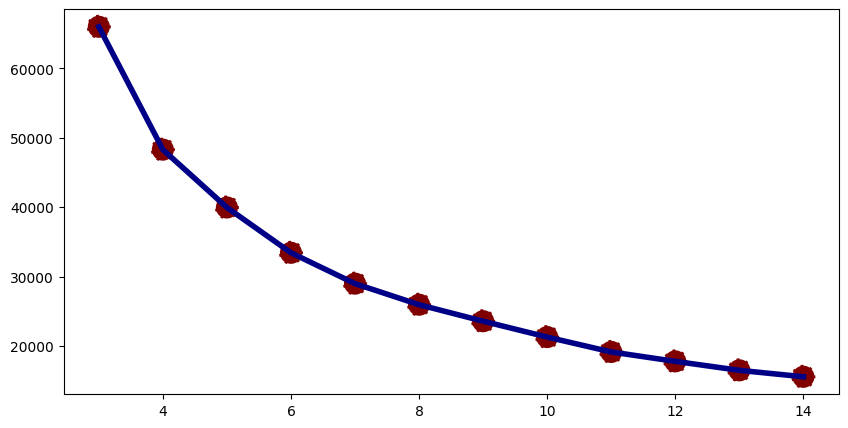

In [ ]:

inertia = []

for i in range(3, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))

sns.lineplot(x=range(3, 15), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(3, 15), y=inertia, s=300, color='#800000',  linestyle='--')


<Axes: >

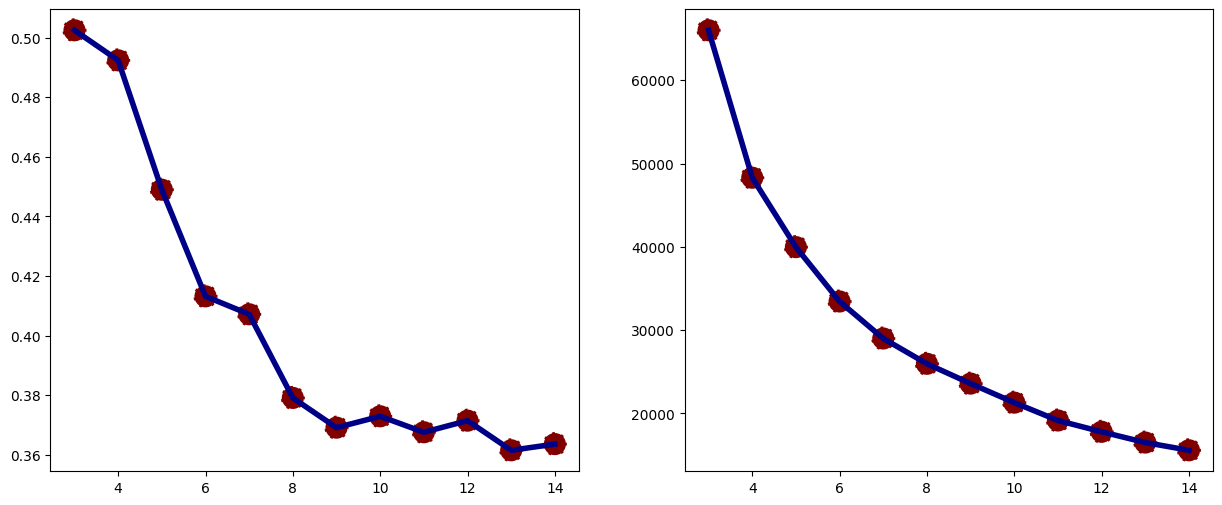

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(3,15))

arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(X_std)
    preds = kmeans.predict(new_df)

    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.lineplot(x=range(3,15), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4, ax=ax[0])
sns.scatterplot(x=range(3,15), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--',ax=ax[0])

sns.lineplot(x=range(3, 15), y=inertia, color='#000087', linewidth = 4,ax=ax[1])
sns.scatterplot(x=range(3, 15), y=inertia, s=300, color='#800000',  linestyle='--', ax=ax[1])

In [ ]:
# 4 merupakan kandidat yang tepat

#Fitting to K-means

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_std)

KMeans(n_clusters=4, random_state=42)

In [ ]:
dataset['clusters'] = kmeans.labels_
dataset.head()

,frequency,monetary,recency,clusters
0,9,85008,84,2
1,12,10826,31,0
2,3,2390,47,0
3,24,7225,70,0
4,13,13452,3,0


<Axes: xlabel='frequency', ylabel='monetary'>

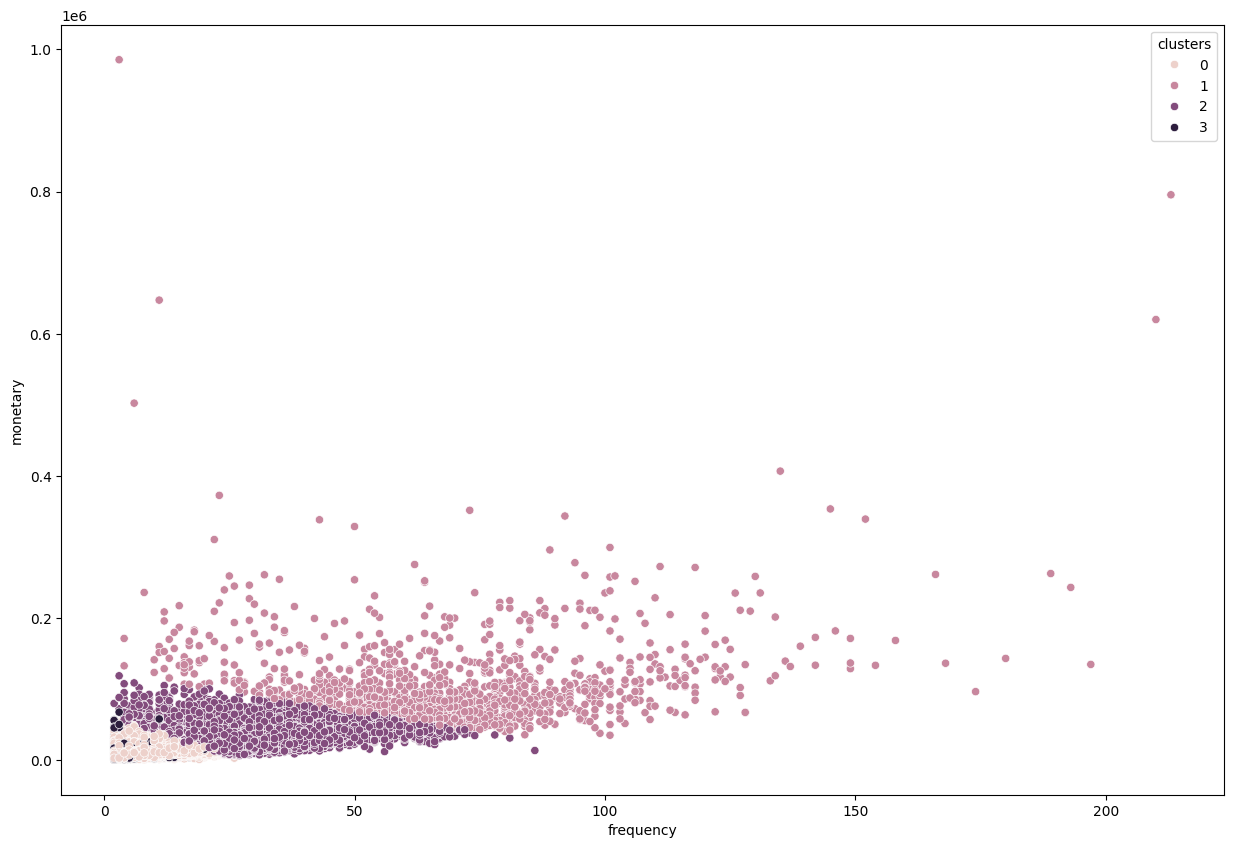

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=dataset, x='frequency', y='monetary',
                hue='clusters')

well the data show quite right, the more the customer order with our app the more point they get

Text(0.5, 0, 'monetary')

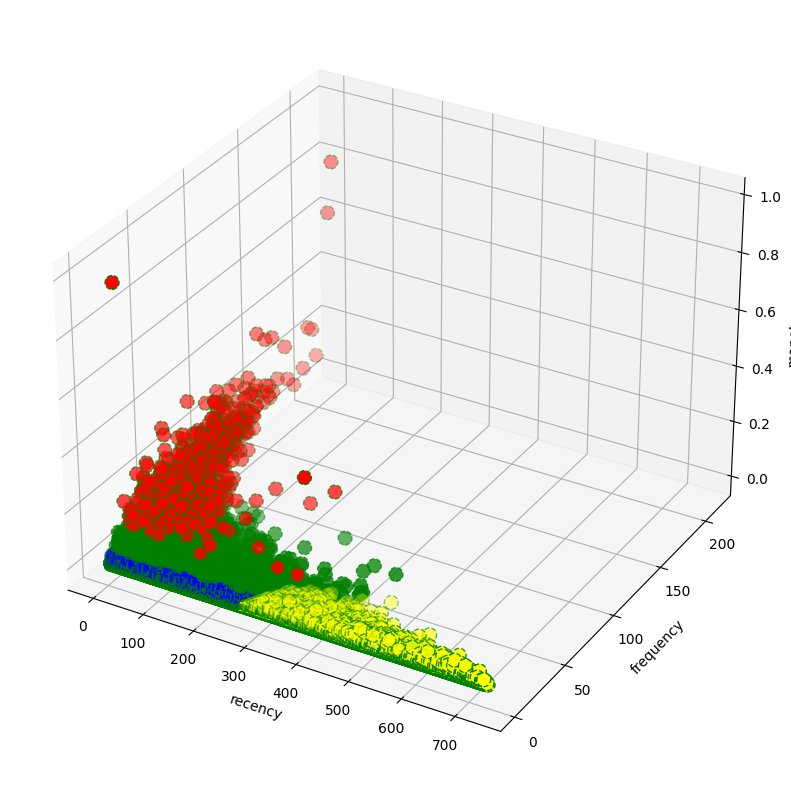

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset["recency"][dataset.clusters == 0], dataset["frequency"][dataset.clusters == 0], dataset["monetary"][dataset.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(dataset["recency"][dataset.clusters == 1], dataset["frequency"][dataset.clusters == 1], dataset["monetary"][dataset.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(dataset["recency"][dataset.clusters == 2], dataset["frequency"][dataset.clusters == 2], dataset["monetary"][dataset.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(dataset["recency"][dataset.clusters == 3], dataset["frequency"][dataset.clusters == 3], dataset["monetary"][dataset.clusters == 3], c='yellow', s=100, edgecolor='green',linestyle='--')


ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary')

In [ ]:
dataset.groupby('clusters').agg({
                            'recency' : ['median'],
                            'frequency' : ['mean'],
                            'monetary' : ['mean']

})

,recency,frequency,monetary
,median,mean,mean
clusters,,,
0,85.0,8.047850,7576.758546
1,9.0,69.209495,104002.470234
2,21.0,30.194887,31045.344877
3,440.0,4.099356,4198.411725


#Interpretasi/Insight

Sepertinya kita mendapatkan 4 kelompok yang menunjukkan pergerakan dari customers kita.

Cluster 0 = Merupakan customers yang sudah lama tidak menggunakan jasa di aplikasi, tidak terlalu banyak perjalanan atau penerbangannya dan memiliki jumlah points yang sedikit.

Cluster 1 = Merupakan customers yang lumayan sering menggunakan jasa aplikasi untuk pemesanan pesawat, sering melakukan penerbangan, dan Memiliki points yang banyak.

Cluster 2 = Sudah lama juga tidak menggunakan jasa pada aplikasi tetapi tidak lebih lama dari cluster 0, memiliki jumlah penerbangan lebih banyak dari cluster 0, dan memiliki point yang lebih tinggi juga dibandingkan dengan cluster 0. Tetapi dalam cluster 2 hanya satu-satunya yang memiliki rata-rata point lebih rendah dibandingkan dengan jumlah penerbangannya, ini menunjukkan 2 hal bisa jadi hanya membeli tiket yang murah (oleh karena itu dapat point yang lebih sedikit) atau kurang mendapatkan penawaran yang baik dengan begitu mereka tidak sering melakukan pemesanan.


Jika dilihat dari hasil rata-rata frequency dan monetary terlihat jika ada 1 penerbangan maka point mereka bisa menyentuh 1000 point


Cluster 3 = Merupakan customers yang sering melakukan pemesanan dalam aplikasi, memiliki banyak penerbangan, dan memiliki points yang tinggi.

Dapat disimpulkan Cluster 3 merupakan customer paling setia dan sudah nyaman dengan aplikasi.

Cluster 0 merupakan customer yang jarang melakukan penerbangan dan jarang pembelian.

Cluster 1 merupakan customer yang masih menggunakan aplikasi dan perlu ditambahkan tingkat ketertarikannya dengan aplikasi.

Cluster 2 merupakan customer yang lebih banyak melakukan penerbangan dibandingkan dengan cluster 0 tetapi tidak mendapatkan point yang lebih tinggi dari rata-rata penerbangannya.

Untuk segi points bisa terlihat bagaimana customers kita mendapatkan point berdasarkan jumlah penerbangan dan jarak dari pemesanan terakhir. Ada satu cluster yang perlu dipahami lebih dalam mengapa suatu kelompok ini tidak mendapatkan point yang lebih tinggi dari penerbangannya